# ML Template

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import & Pre-process

### Import from File

In [7]:
dataset = pd.read_csv('position_salaries.csv')
features = dataset.iloc[:, 1:-1].to_numpy()
dependents = dataset.iloc[:, -1].to_numpy()

print(dataset, features, dependents, sep="\n\n")

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


### Encode (Optional)

### Split into Training & Test Data

In [ ]:
# from sklearn.model_selection import train_test_split

# features_train, features_test, dependents_train, dependents_test = train_test_split(features, dependents, test_size = 0.2, random_state = 0)

### Feature Scaling (Optional)

In [8]:
dependents = dependents.reshape(len(dependents), 1)

In [9]:
from sklearn.preprocessing import StandardScaler

# Use two different scalers for features and dependents so they don't affect each other's scaling.
feature_scaler = StandardScaler()
features = feature_scaler.fit_transform(features)

dependent_scaler = StandardScaler()
dependents = dependent_scaler.fit_transform(dependents)

print(features, dependents, sep="\n\n")

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Train Model & Predict Test Data

### Train Model

In [10]:
from sklearn.svm import SVR

model = SVR(kernel='rbf')

model.fit(features, dependents)

/home/vscode/.cache/pypoetry/virtualenvs/machine-learning-wdIh9zAY-py3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### Predict

In [13]:
predictions = dependent_scaler.inverse_transform(model.predict(features).reshape(-1, 1))

## Visualize Results

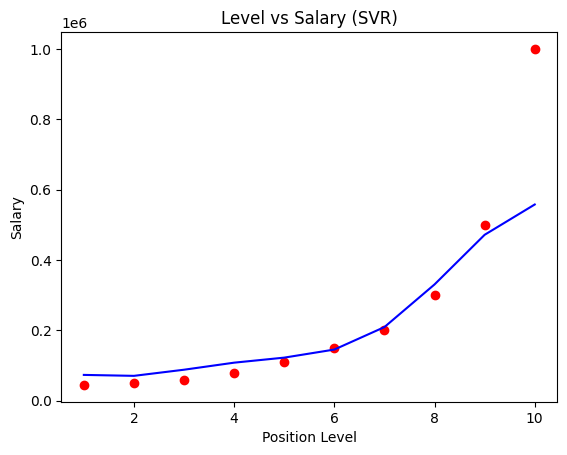

In [14]:
plt.title('Level vs Salary (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.scatter(feature_scaler.inverse_transform(features), dependent_scaler.inverse_transform(dependents), color = 'red')
plt.plot(feature_scaler.inverse_transform(features), predictions, color = 'blue')

### High Resolution Curve

/tmp/ipykernel_7442/4287117101.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid = np.arange(min(feature_scaler.inverse_transform(features)), max(feature_scaler.inverse_transform(features)), 0.1)


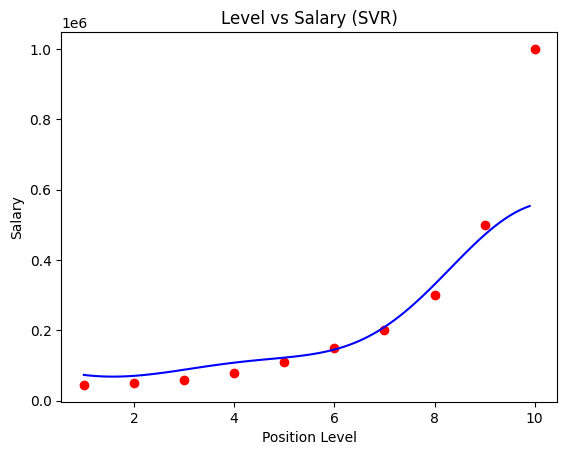

In [17]:
plt.title('Level vs Salary (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')

x_grid = np.arange(min(feature_scaler.inverse_transform(features)), max(feature_scaler.inverse_transform(features)), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(feature_scaler.inverse_transform(features), dependent_scaler.inverse_transform(dependents), color = 'red')
plt.plot(x_grid, dependent_scaler.inverse_transform(model.predict(feature_scaler.transform(x_grid)).reshape(-1,1)), color = 'blue')

### Predict New Results

In [15]:
# Need to pass a scaled value to the model because the model was trained on scaled values.
# We also need to reshape and inverse transform the scaled result to get the actual value.
dependent_scaler.inverse_transform(model.predict(feature_scaler.transform([[6.5]])).reshape(-1, 1))

array([[170370.0204065]])